РЕЗУЛЬТАТЫ АНАЛИЗА:
Индекс точки начала линейного участка: 4
Номер в списке: 5
Индекс точки конца линейного участка: 14
Номер в списке: 15
Длина линейного участка: 10 точек

ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Всего точек данных: 549
Нагрузка в начале линейного участка: 5340.00 Н
Нагрузка в конце линейного участка: 26900.00 Н
Перемещение в начале: 0.216 мм
Перемещение в конце: 0.493 мм


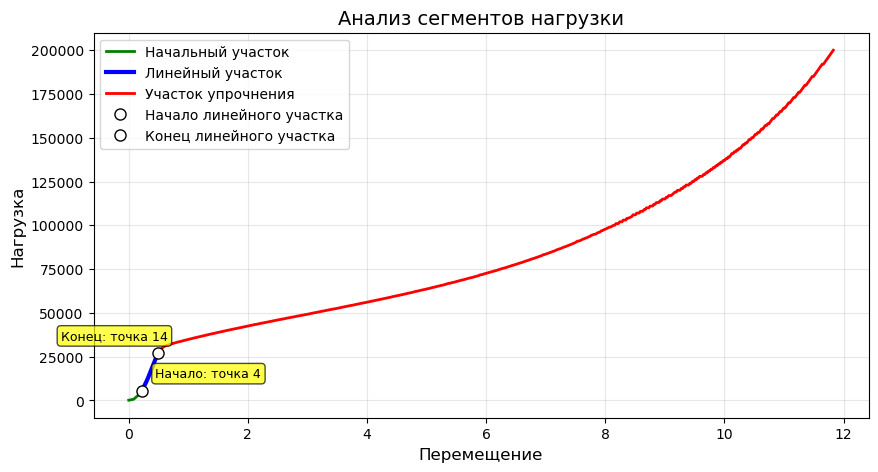

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Загрузка массива данных
load_stroke_array = np.loadtxt('../Laptev/load_stroke_compression.csv', 
                               delimiter=',', dtype=float, encoding='utf-8-sig')

# Класс определения сегментов нагрузки (оригинальный метод)
class segments:
    def __init__(self, load):
        self.load = load
        self.i_lin = 0
        self.i_str = 0
        self.i_end = 0
        
        # Находим точку на линейном участке
        for self.i_lin in range(len(self.load[:,0])-3):
            tan_1 = (self.load[self.i_lin,1] - self.load[self.i_lin+1,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+1,0])
            tan_2 = (self.load[self.i_lin,1] - self.load[self.i_lin+2,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+2,0])
            tan_3 = (self.load[self.i_lin,1] - self.load[self.i_lin+3,1])/(self.load[self.i_lin,0] - self.load[self.i_lin+3,0])
            if 0.95 <= tan_2/tan_1 <= 1.05 and 0.95 <= tan_3/tan_2 <= 1.05 and 0.95 <= tan_3/tan_1 <= 1.05:
                break
            else:
                self.i_lin += 1
    
    def strt(self):
        # Поиск начала линейного участка
        i_str = self.i_lin
        tan_str = (self.load[i_str+1,0] - self.load[i_str,0])/(self.load[i_str+1,1] - self.load[i_str,1])
        k = 0
        while k <= 1.5*tan_str:
            i_str -= 1
            k = (self.load[i_str+1,0] - self.load[i_str,0])/(self.load[i_str+1,1] - self.load[i_str,1])
        i_str += 1
        self.i_str = i_str
        return i_str
   
    def end(self):
        # Поиск конца линейного участка
        i_end = self.i_lin
        tan_end = (self.load[i_end+1,0] - self.load[i_end,0])/(self.load[i_end+1,1] - self.load[i_end,1])
        k = 0
        while k <= 1.5*tan_end:
            i_end += 1
            k = (self.load[i_end+1,0] - self.load[i_end,0])/(self.load[i_end+1,1] - self.load[i_end,1])
        self.i_end = i_end
        return i_end
    
    def graph(self):
        # Разделяем данные на участки
        array_str = self.load[0:self.i_str+1, :]
        array_lin = self.load[self.i_str:self.i_end+1, :]
        array_end = self.load[self.i_end:, :]
        
        # Создаем график
        plt.figure(figsize=(10, 5))
        
        # Рисуем участки разными цветами
        plt.plot(array_str[:, 0], array_str[:, 1], '-', color='green', 
                label='Начальный участок', linewidth=2)
        plt.plot(array_lin[:, 0], array_lin[:, 1], '-', color='blue', 
                label='Линейный участок', linewidth=3)
        plt.plot(array_end[:, 0], array_end[:, 1], '-', color='red', 
                label='Участок упрочнения', linewidth=2)
        
        # Отмечаем граничные точки
        plt.plot(self.load[self.i_str, 0], self.load[self.i_str, 1], 
                'o', color='black', markersize=8, 
                label='Начало линейного участка', markerfacecolor='white')
        plt.plot(self.load[self.i_end, 0], self.load[self.i_end, 1], 
                'o', color='black', markersize=8, 
                label='Конец линейного участка', markerfacecolor='white')
        
        # Настройки графика
        plt.xlabel('Перемещение', fontsize=12)
        plt.ylabel('Нагрузка', fontsize=12)
        plt.title('Анализ сегментов нагрузки', fontsize=14)
        plt.legend(loc='best', fontsize=10)
        plt.grid(True, alpha=0.3)
        
        # Добавляем информацию о точках
        plt.annotate(f'Начало: точка {self.i_str}', 
                    xy=(self.load[self.i_str, 0], self.load[self.i_str, 1]),
                    xytext=(10, 10), textcoords='offset points',
                    fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
        
        plt.annotate(f'Конец: точка {self.i_end}', 
                    xy=(self.load[self.i_end, 0], self.load[self.i_end, 1]),
                    xytext=(-70, 10), textcoords='offset points',
                    fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Основной блок выполнения
if __name__ == "__main__":
    # Создаем объект и анализируем данные
    array = segments(load_stroke_array[:, :])
    
    # Находим границы участков
    start_idx = array.strt()
    end_idx = array.end()
    
    # Выводим результаты
    print('=' * 50)
    print('РЕЗУЛЬТАТЫ АНАЛИЗА:')
    print('=' * 50)
    print(f'Индекс точки начала линейного участка: {start_idx}')
    print(f'Номер в списке: {start_idx + 1}')
    print(f'Индекс точки конца линейного участка: {end_idx}')
    print(f'Номер в списке: {end_idx + 1}')
    print(f'Длина линейного участка: {end_idx - start_idx} точек')
    print('=' * 50)
    
    # Дополнительная информация
    print('\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:')
    print(f'Всего точек данных: {len(load_stroke_array)}')
    print(f'Нагрузка в начале линейного участка: {load_stroke_array[start_idx, 1]:.2f} Н')
    print(f'Нагрузка в конце линейного участка: {load_stroke_array[end_idx, 1]:.2f} Н')
    print(f'Перемещение в начале: {load_stroke_array[start_idx, 0]:.3f} мм')
    print(f'Перемещение в конце: {load_stroke_array[end_idx, 0]:.3f} мм')
    
    # Строим график
    array.graph()
    plt.show()